<a href="https://colab.research.google.com/github/abdyraman/omers-peopleanalytics/blob/main/OMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [41]:
df_sheet1 = pd.read_excel('Lead Employee Listening - Work task.xlsx',sheet_name="Demographic")
df_sheet2 = pd.read_excel('Lead Employee Listening - Work task.xlsx',sheet_name="Raw Data")


In [42]:
# Set the first row as the header
df_sheet2.columns = df_sheet2.iloc[0]  # Set the first row as column names
df_sheet2 = df_sheet2.drop(0)  # Drop the first row since it's now the header
# Reset the index to avoid issues with the dropped row
df_sheet2 = df_sheet2.reset_index(drop=True)

In [43]:
#Combined two datasets on "ID" column
combined_df=pd.merge(df_sheet1,df_sheet2,on='ID')
combined_df.head(5)

,ID,Country,Tenure,Level,I am proud to work for this company,I rarely think about looking for a new job with another company,I would recommend this company to people I know as a great place to work,My work gives me a feeling of personal accomplishment,This company motivates me to contribute more than is normally required to complete my work,Engagement index,...,My job is challenging and interesting,"On my team, decisions are made in a timely manner",My manager supports my efforts to balance my work and personal life,"I am comfortable voicing my ideas and opinions, even if they are different from others",I have the training I need to do my job effectively,I receive feedback that helps me improve my performance,I am encouraged to come up with better ways of doing things,This company is a safe place to work,Working at this company has a positive impact on my well-being.,My manager encourages collaboration on my team
0,1,Europe,Less than 1 year,Individual contributor,4,5,5,5,3,4.4,...,5,4,5,3,5,5,5,4,4,5
1,2,USA,5-10 years,Manager,4,4,5,3,2,3.6,...,3,4,4,2,4,4,5,4,5,4
2,3,Canada,10+ years,Director,5,4,3,4,2,3.6,...,4,2,4,3,3,3,3,3,5,4
3,4,Canada,1-5 years,VP+,5,4,5,3,2,3.8,...,3,3,4,3,3,3,2,4,1,4
4,5,Europe,1-5 years,Manager,4,5,5,4,3,4.2,...,3,1,3,5,3,3,5,4,5,4


In [44]:
#Reset index of the dataframe on "ID"
combined_df_indexed=combined_df.set_index('ID')
combined_df_indexed

,Country,Tenure,Level,I am proud to work for this company,I rarely think about looking for a new job with another company,I would recommend this company to people I know as a great place to work,My work gives me a feeling of personal accomplishment,This company motivates me to contribute more than is normally required to complete my work,Engagement index,There is open and honest communication at this company,...,My job is challenging and interesting,"On my team, decisions are made in a timely manner",My manager supports my efforts to balance my work and personal life,"I am comfortable voicing my ideas and opinions, even if they are different from others",I have the training I need to do my job effectively,I receive feedback that helps me improve my performance,I am encouraged to come up with better ways of doing things,This company is a safe place to work,Working at this company has a positive impact on my well-being.,My manager encourages collaboration on my team
ID,,,,,,,,,,,,,,,,,,,,,
1,Europe,Less than 1 year,Individual contributor,4,5,5,5,3,4.4,4,...,5,4,5,3,5,5,5,4,4,5
2,USA,5-10 years,Manager,4,4,5,3,2,3.6,4,...,3,4,4,2,4,4,5,4,5,4
3,Canada,10+ years,Director,5,4,3,4,2,3.6,5,...,4,2,4,3,3,3,3,3,5,4
4,Canada,1-5 years,VP+,5,4,5,3,2,3.8,2,...,3,3,4,3,3,3,2,4,1,4
5,Europe,1-5 years,Manager,4,5,5,4,3,4.2,1,...,3,1,3,5,3,3,5,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,USA,10+ years,Director,3,4,5,3,5,4,1,...,3,4,4,5,5,4,4,1,5,5
97,Canada,Less than 1 year,Manager,3,2,4,5,2,3.2,1,...,3,5,5,4,4,4,5,2,1,5
98,Canada,5-10years,Individual contributor,4,3,2,3,3,3,2,...,1,3,5,1,3,5,1,4,1,4


In [45]:
# There are 1,470 rows and 35 columns in the data
combined_df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 24 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Country                                                                                     100 non-null    object
 1   Tenure                                                                                      99 non-null     object
 2   Level                                                                                       99 non-null     object
 3   I am proud to work for this company                                                         100 non-null    object
 4   I rarely think about looking for a new job with another company                             100 non-null    object
 5   I would recommend this company to people I know as a gr

In [46]:
#check for NaN values and found two missing values
combined_df_indexed.isnull().sum()

,0
Country,0
Tenure,1
Level,1
I am proud to work for this company,0
I rarely think about looking for a new job with another company,0
I would recommend this company to people I know as a great place to work,0
My work gives me a feeling of personal accomplishment,0
This company motivates me to contribute more than is normally required to complete my work,0
Engagement index,0
There is open and honest communication at this company,0


Data cleaning

There are two missing values in dataset "Tenure" and "Level" columns.

# Descriptive statistics

In [47]:
unique_counts_objects = combined_df_indexed.select_dtypes('object').nunique()
unique_counts_objects

,0
Country,3
Tenure,5
Level,5
I am proud to work for this company,5
I rarely think about looking for a new job with another company,5
I would recommend this company to people I know as a great place to work,5
My work gives me a feeling of personal accomplishment,5
This company motivates me to contribute more than is normally required to complete my work,5
Engagement index,19
There is open and honest communication at this company,5


In [48]:
# Loop through each categorical variable and print its unique values
for i in unique_counts_objects.index:
    print('Unique values of', i, set(combined_df_indexed[i]))

Unique values of Country {'Canada', 'Europe', 'USA'}
Unique values of Tenure {'10+ years', '5-10years', '1-5 years', 'Less than 1 year', nan, '5-10 years'}
Unique values of Level {'VP+', 'Director', 'Manager', nan, 'Individual contributor', 'Individual contrbutor'}
Unique values of I am proud to work for this company {1, 2, 3, 4, 5}
Unique values of I rarely think about looking for a new job with another company {1, 2, 3, 4, 5}
Unique values of I would recommend this company to people I know as a great place to work {1, 2, 3, 4, 5}
Unique values of My work gives me a feeling of personal accomplishment {1, 2, 3, 4, 5}
Unique values of This company motivates me to contribute more than is normally required to complete my work {1, 2, 3, 4, 5}
Unique values of Engagement index {1.8, 2.4, 3.8, 3.6, 4.4, 4.2, 3.2, 3.4, 4, 2, 2.6, 4.6, 4.8, 3, 1.6, 1.2, 2.2, 2.8, 1.4}
Unique values of There is open and honest communication at this company {1, 2, 3, 4, 5}
Unique values of At this company, there

The typo in value name "Individual Contrbutor" is the same as "Individual Contributor". I am changing it to the correst spelling.

In [49]:
# Replace the misspelled value in the 'Level' and 'Tenure' columns
combined_df_indexed['Level'] = combined_df_indexed['Level'].replace('Individual contrbutor', 'Individual contributor')
combined_df_indexed['Tenure'] = combined_df_indexed['Tenure'].replace('5-10years', '5-10 years')


<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


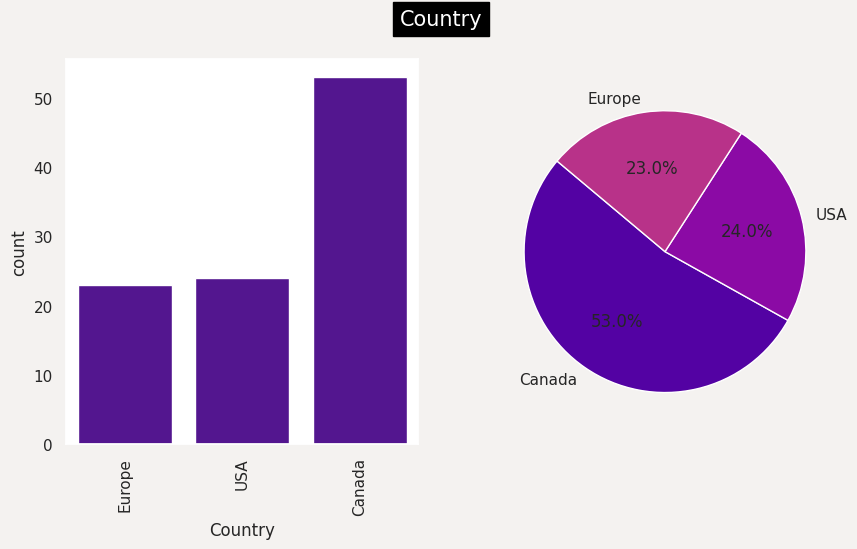

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


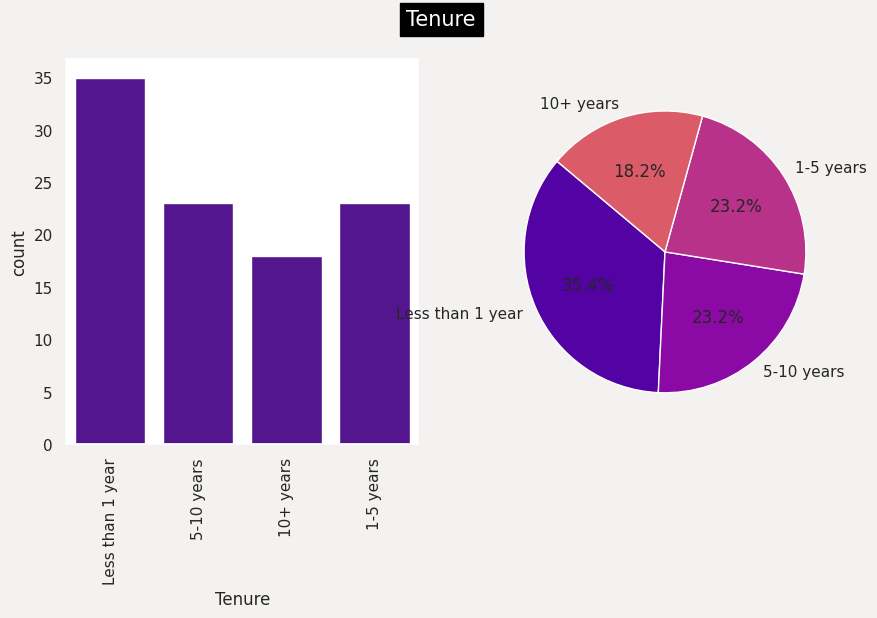

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


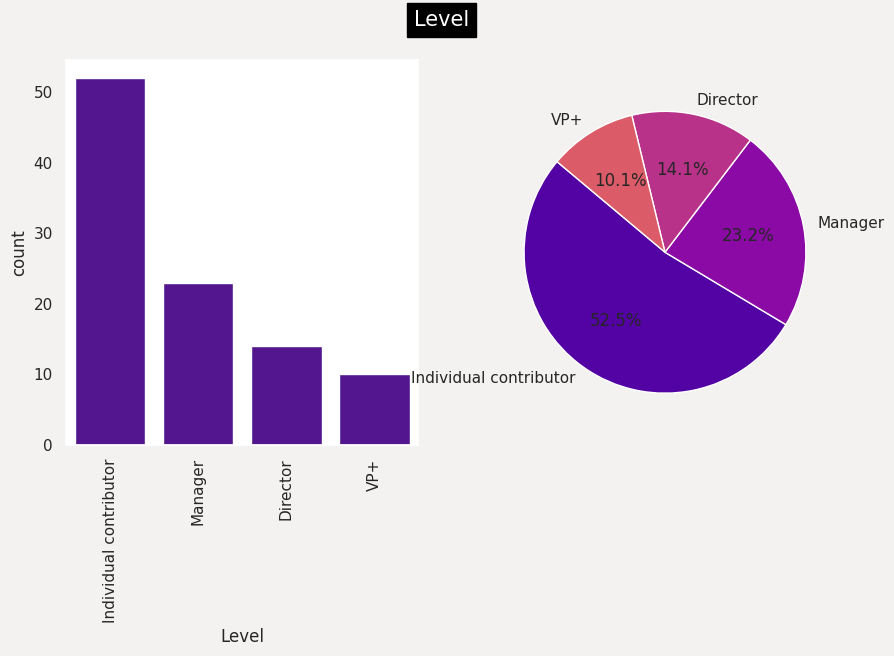

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


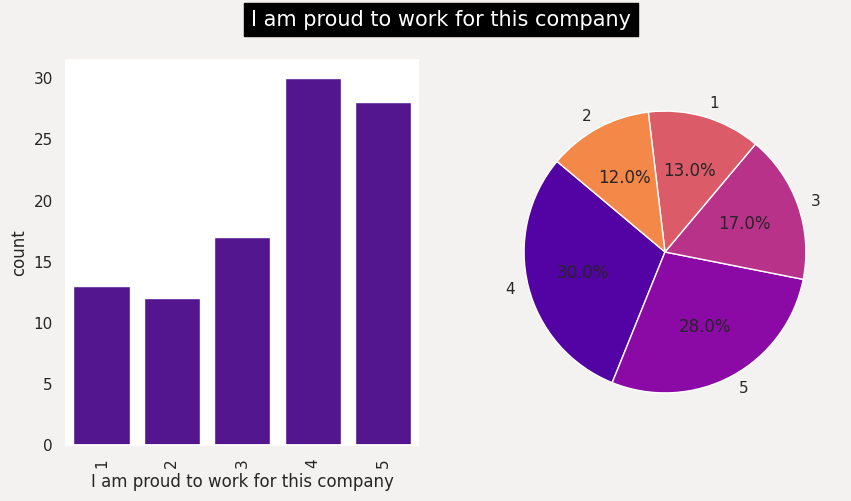

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


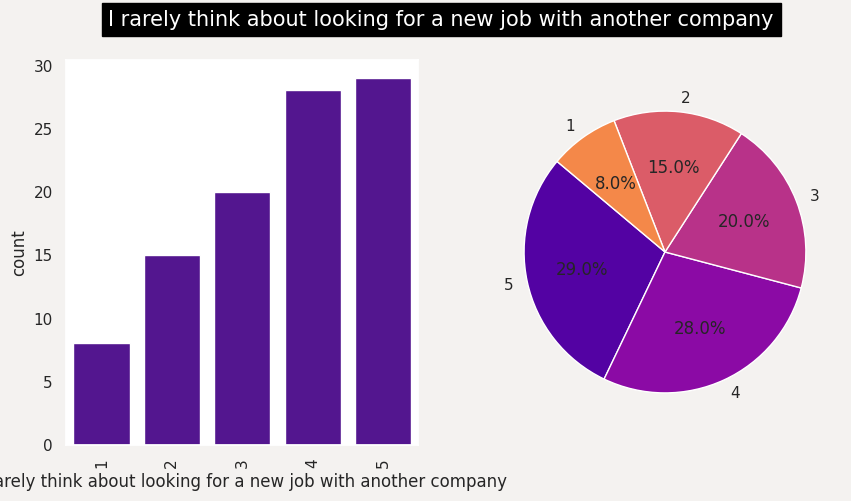

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


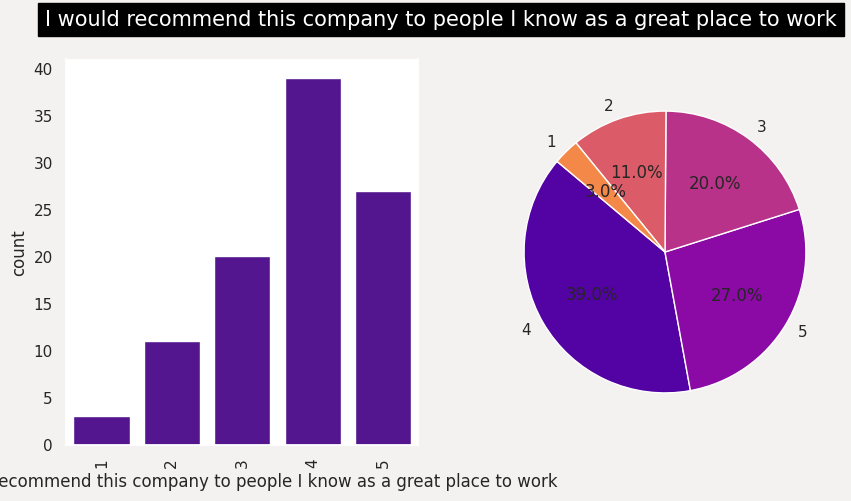

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


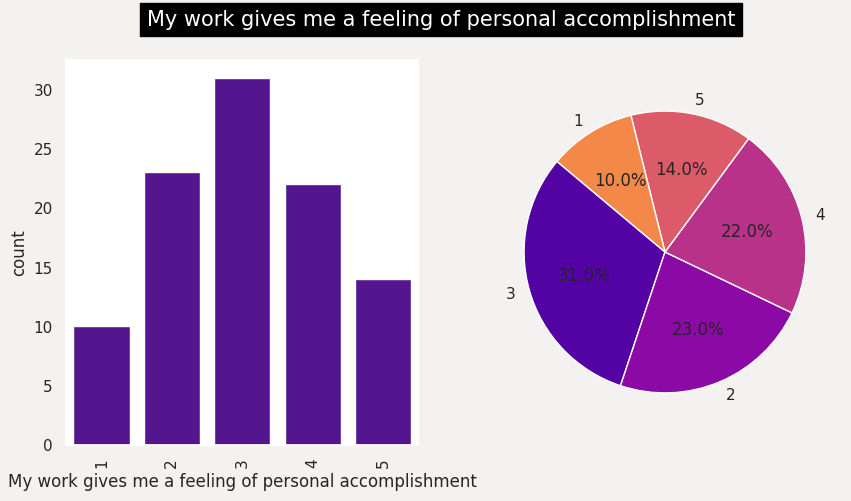

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


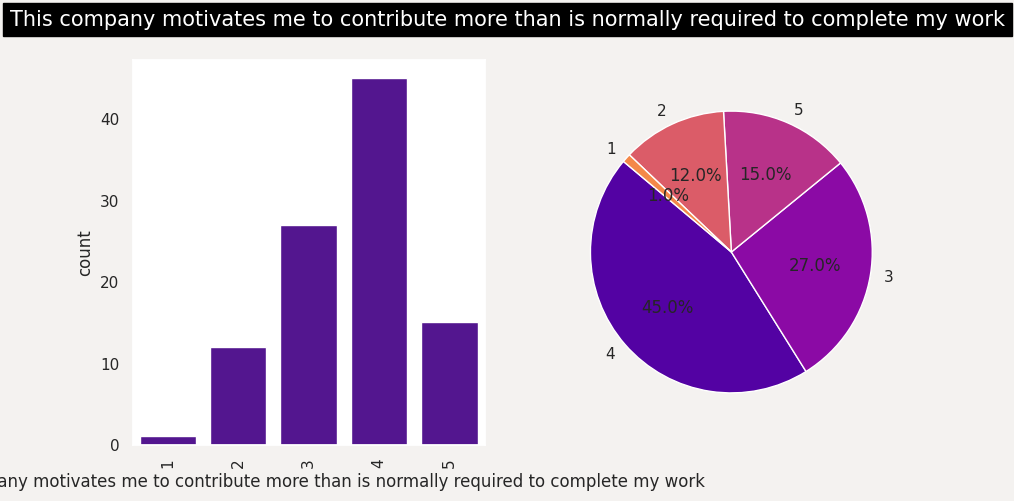

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


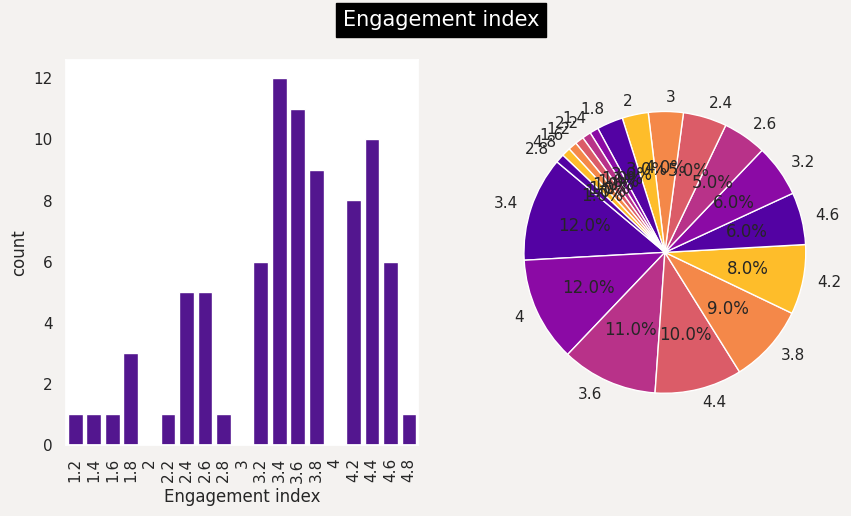

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


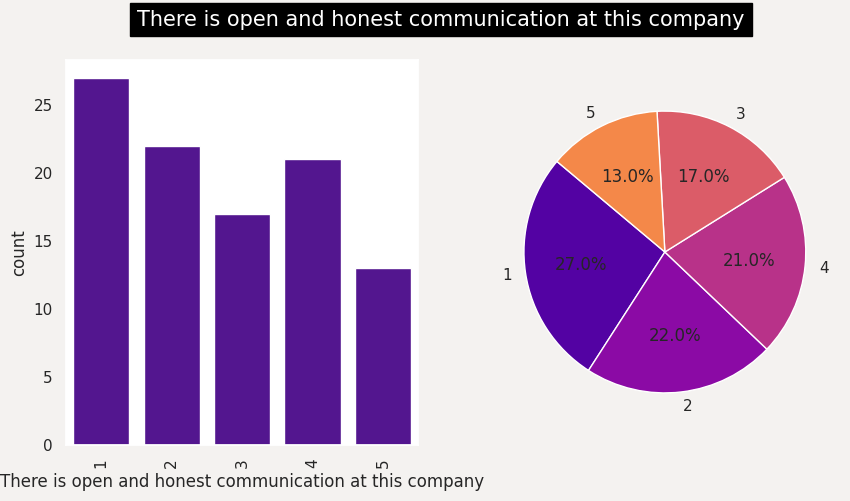

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


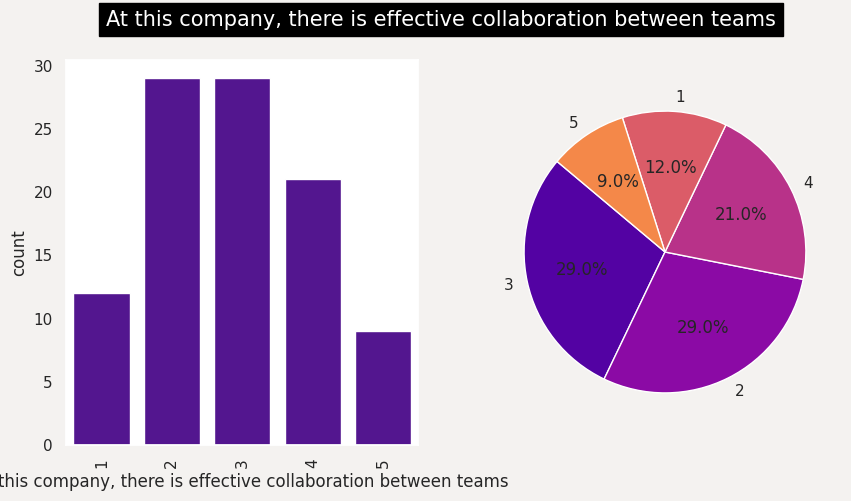

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


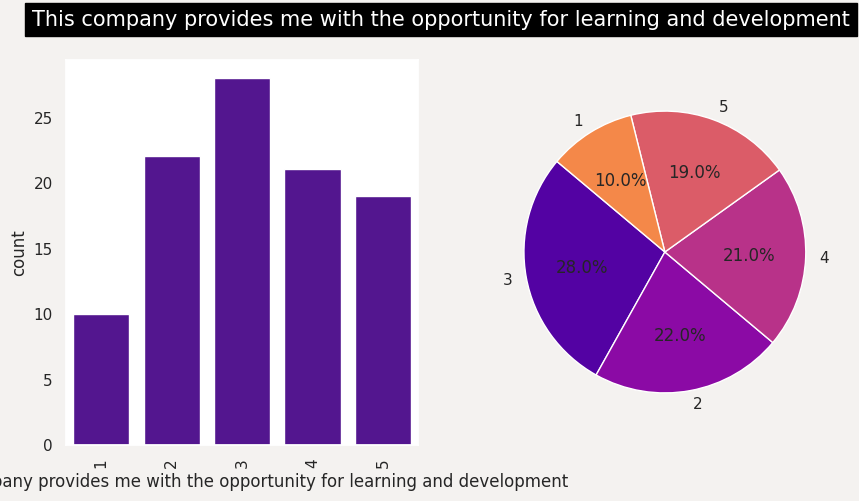

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


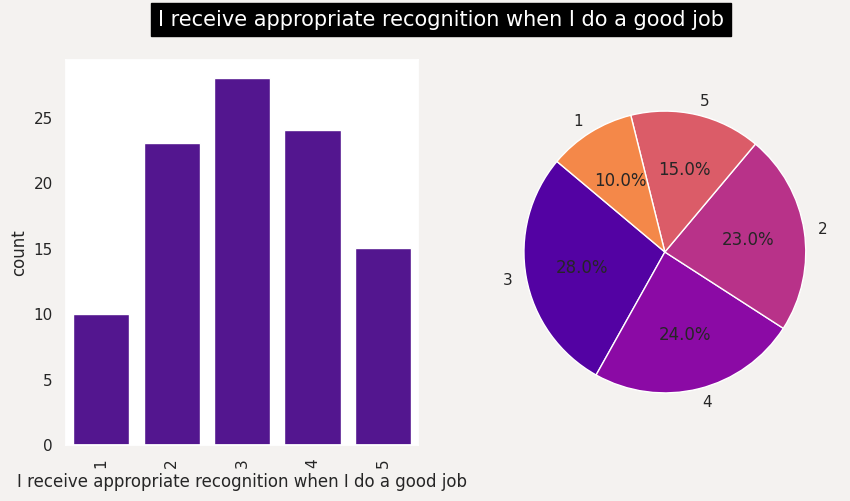

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


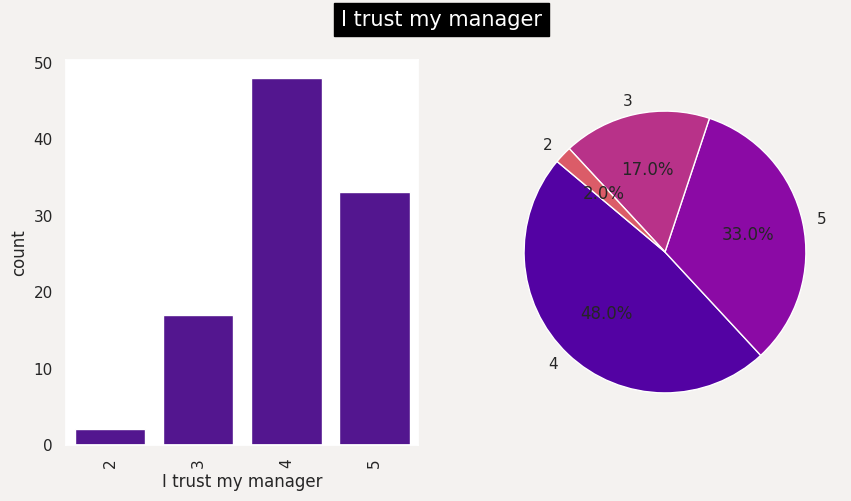

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


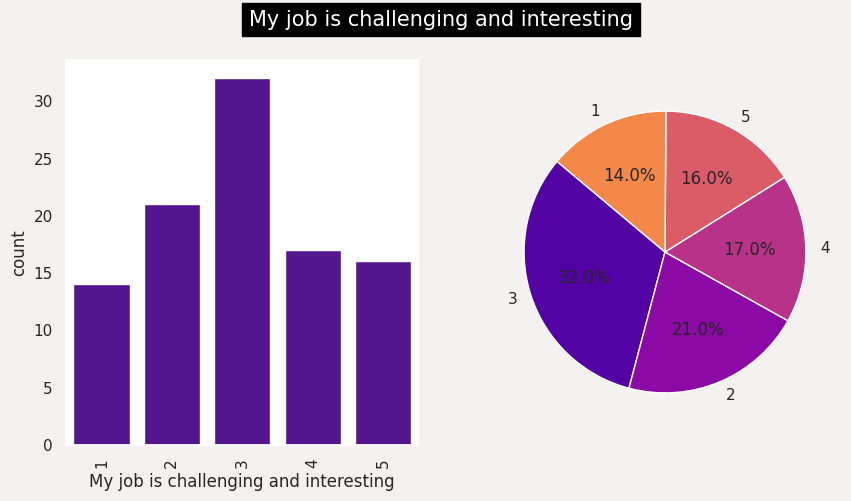

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


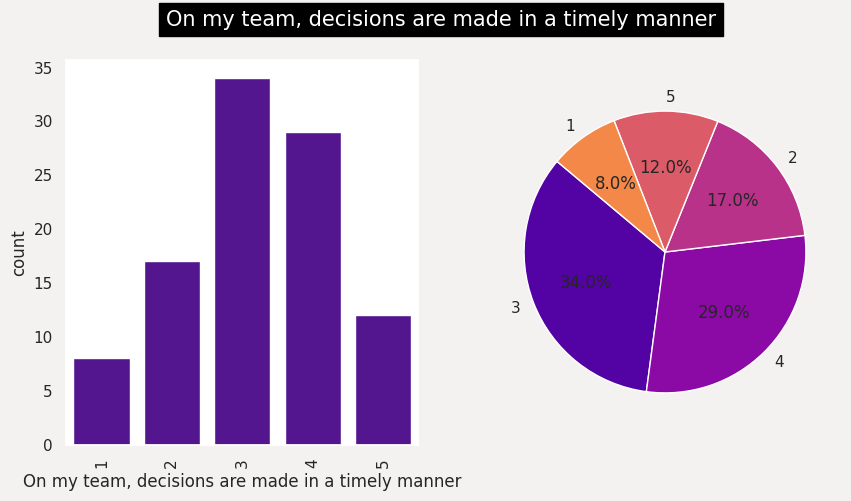

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


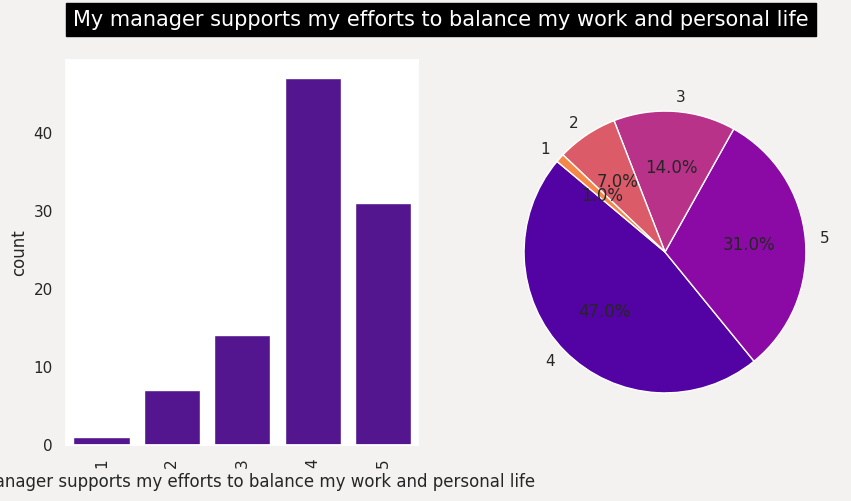

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


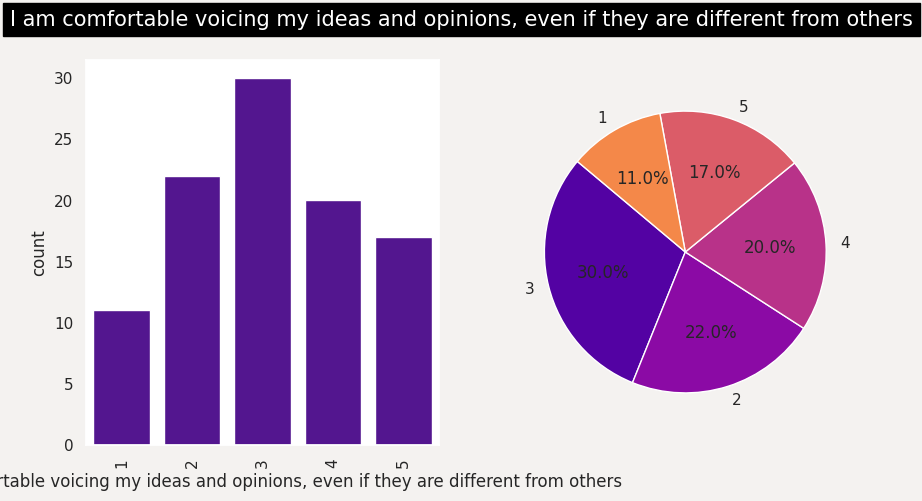

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


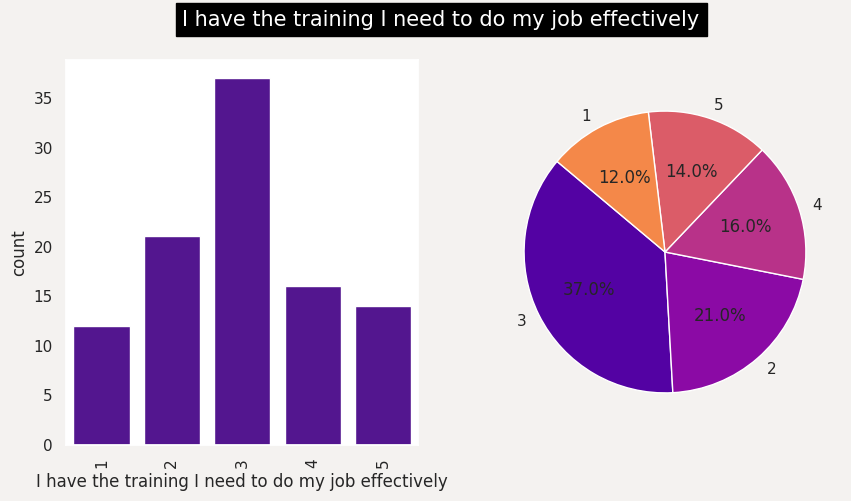

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


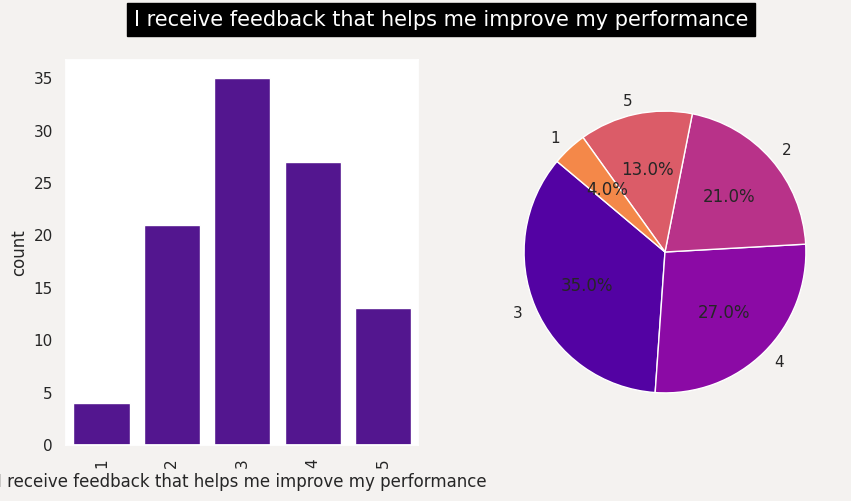

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


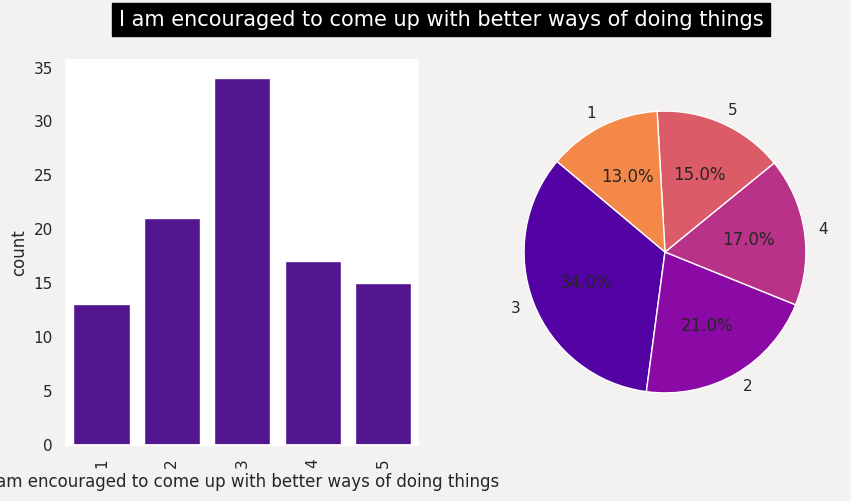

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


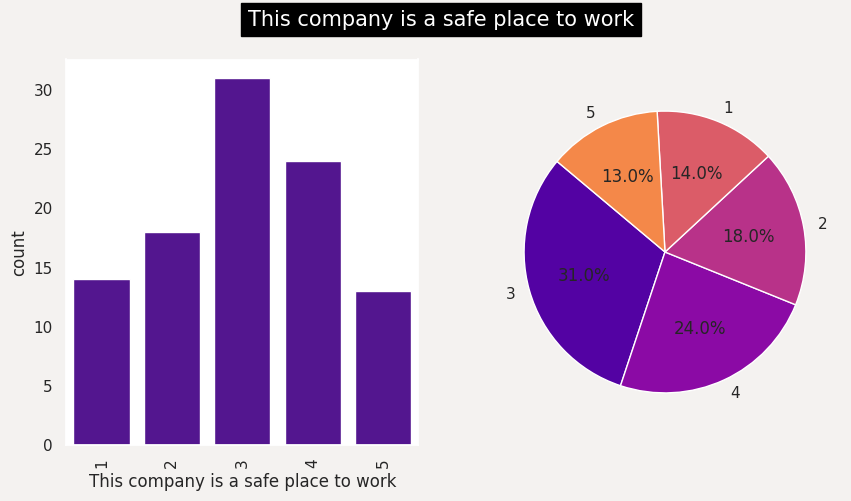

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


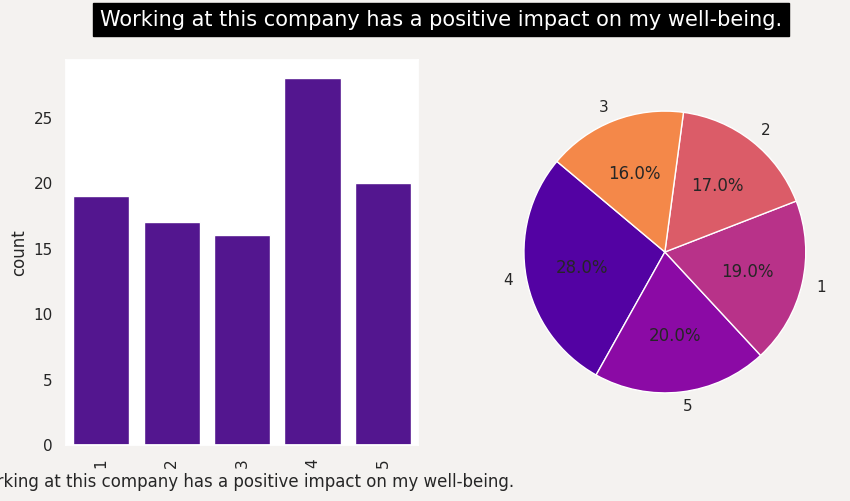

<ipython-input-50-bdf3db55b1bb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


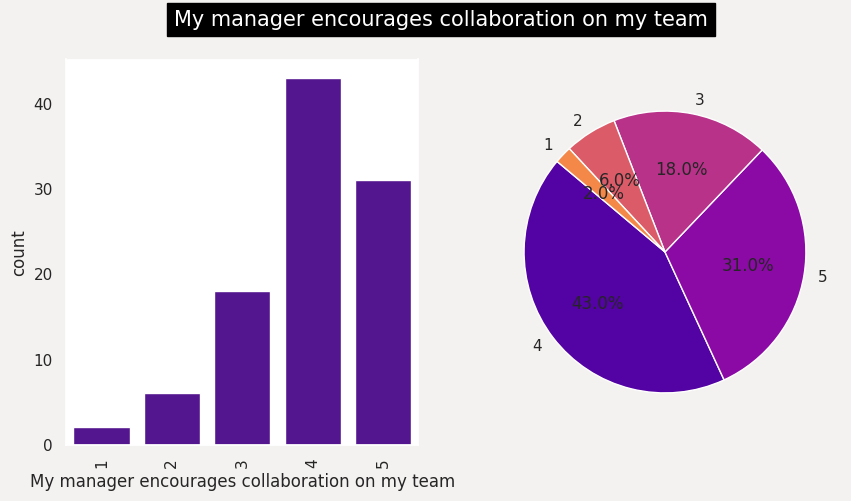

In [50]:
# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": '#F4F2F0'})
sns.set_palette("plasma")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects.index:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Countplot
    ax1 = sns.countplot(data= combined_df_indexed, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    # Pie chart
    count_values = combined_df_indexed[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()


In [51]:
print(combined_df_indexed.columns)

Index(['Country', 'Tenure', 'Level', 'I am proud to work for this company',
       'I rarely think about looking for a new job with another company',
       'I would recommend this company to people I know as a great place to work',
       'My work gives me a feeling of personal accomplishment',
       'This company motivates me to contribute more than is normally required to complete my work',
       'Engagement index',
       'There is open and honest communication at this company',
       'At this company, there is effective collaboration between teams',
       'This company provides me with the opportunity for learning and development',
       'I receive appropriate recognition when I do a good job',
       'I trust my manager', 'My job is challenging and interesting',
       'On my team, decisions are made in a timely manner',
       'My manager supports my efforts to balance my work and personal life',
       'I am comfortable voicing my ideas and opinions, even if they are diffe

In [52]:
#Converting text data to numeric data
columns_to_convert =['I am proud to work for this company',
       'I rarely think about looking for a new job with another company',
       'I would recommend this company to people I know as a great place to work',
       'My work gives me a feeling of personal accomplishment',
       'This company motivates me to contribute more than is normally required to complete my work',
       'Engagement index',
       'There is open and honest communication at this company',
       'At this company, there is effective collaboration between teams',
       'This company provides me with the opportunity for learning and development',
       'I receive appropriate recognition when I do a good job',
       'I trust my manager', 'My job is challenging and interesting',
       'On my team, decisions are made in a timely manner',
       'My manager supports my efforts to balance my work and personal life',
       'I am comfortable voicing my ideas and opinions, even if they are different from others',
       'I have the training I need to do my job effectively',
       'I receive feedback that helps me improve my performance',
       'I am encouraged to come up with better ways of doing things',
       'This company is a safe place to work',
       'Working at this company has a positive impact on my well-being.',
       'My manager encourages collaboration on my team']

# Convert each specified column to float64
for col in columns_to_convert:
    combined_df_indexed[col] = pd.to_numeric(combined_df_indexed[col], errors='coerce')


In [53]:
# Check the data types of the DataFrame to ensure conversion
print(combined_df_indexed.dtypes)

Country                                                                                        object
Tenure                                                                                         object
Level                                                                                          object
I am proud to work for this company                                                             int64
I rarely think about looking for a new job with another company                                 int64
I would recommend this company to people I know as a great place to work                        int64
My work gives me a feeling of personal accomplishment                                           int64
This company motivates me to contribute more than is normally required to complete my work      int64
Engagement index                                                                              float64
There is open and honest communication at this company                            

In [59]:
#Checking on numeric datatypes details
num=combined_df_indexed.select_dtypes(include=['int64','float64'])
num.describe().T

,count,mean,std,min,25%,50%,75%,max
I am proud to work for this company,100.0,3.480,1.359441,1.0,2.75,4.0,5.00,5.0
I rarely think about looking for a new job with another company,100.0,3.550,1.274260,1.0,3.00,4.0,5.00,5.0
I would recommend this company to people I know as a great place to work,100.0,3.760,1.064771,1.0,3.00,4.0,5.00,5.0
My work gives me a feeling of personal accomplishment,100.0,3.070,1.191341,1.0,2.00,3.0,4.00,5.0
This company motivates me to contribute more than is normally required to complete my work,100.0,3.610,0.919980,1.0,3.00,4.0,4.00,5.0
Engagement index,100.0,3.494,0.826068,1.2,3.15,3.6,4.05,4.8
There is open and honest communication at this company,100.0,2.710,1.401983,1.0,1.00,3.0,4.00,5.0
"At this company, there is effective collaboration between teams",100.0,2.860,1.154875,1.0,2.00,3.0,4.00,5.0
This company provides me with the opportunity for learning and development,100.0,3.170,1.255734,1.0,2.00,3.0,4.00,5.0
I receive appropriate recognition when I do a good job,100.0,3.110,1.213518,1.0,2.00,3.0,4.00,5.0


<ipython-input-60-af8475005b51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-60-af8475005b51>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-60-af8475005b51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-60-af8475005b51>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#

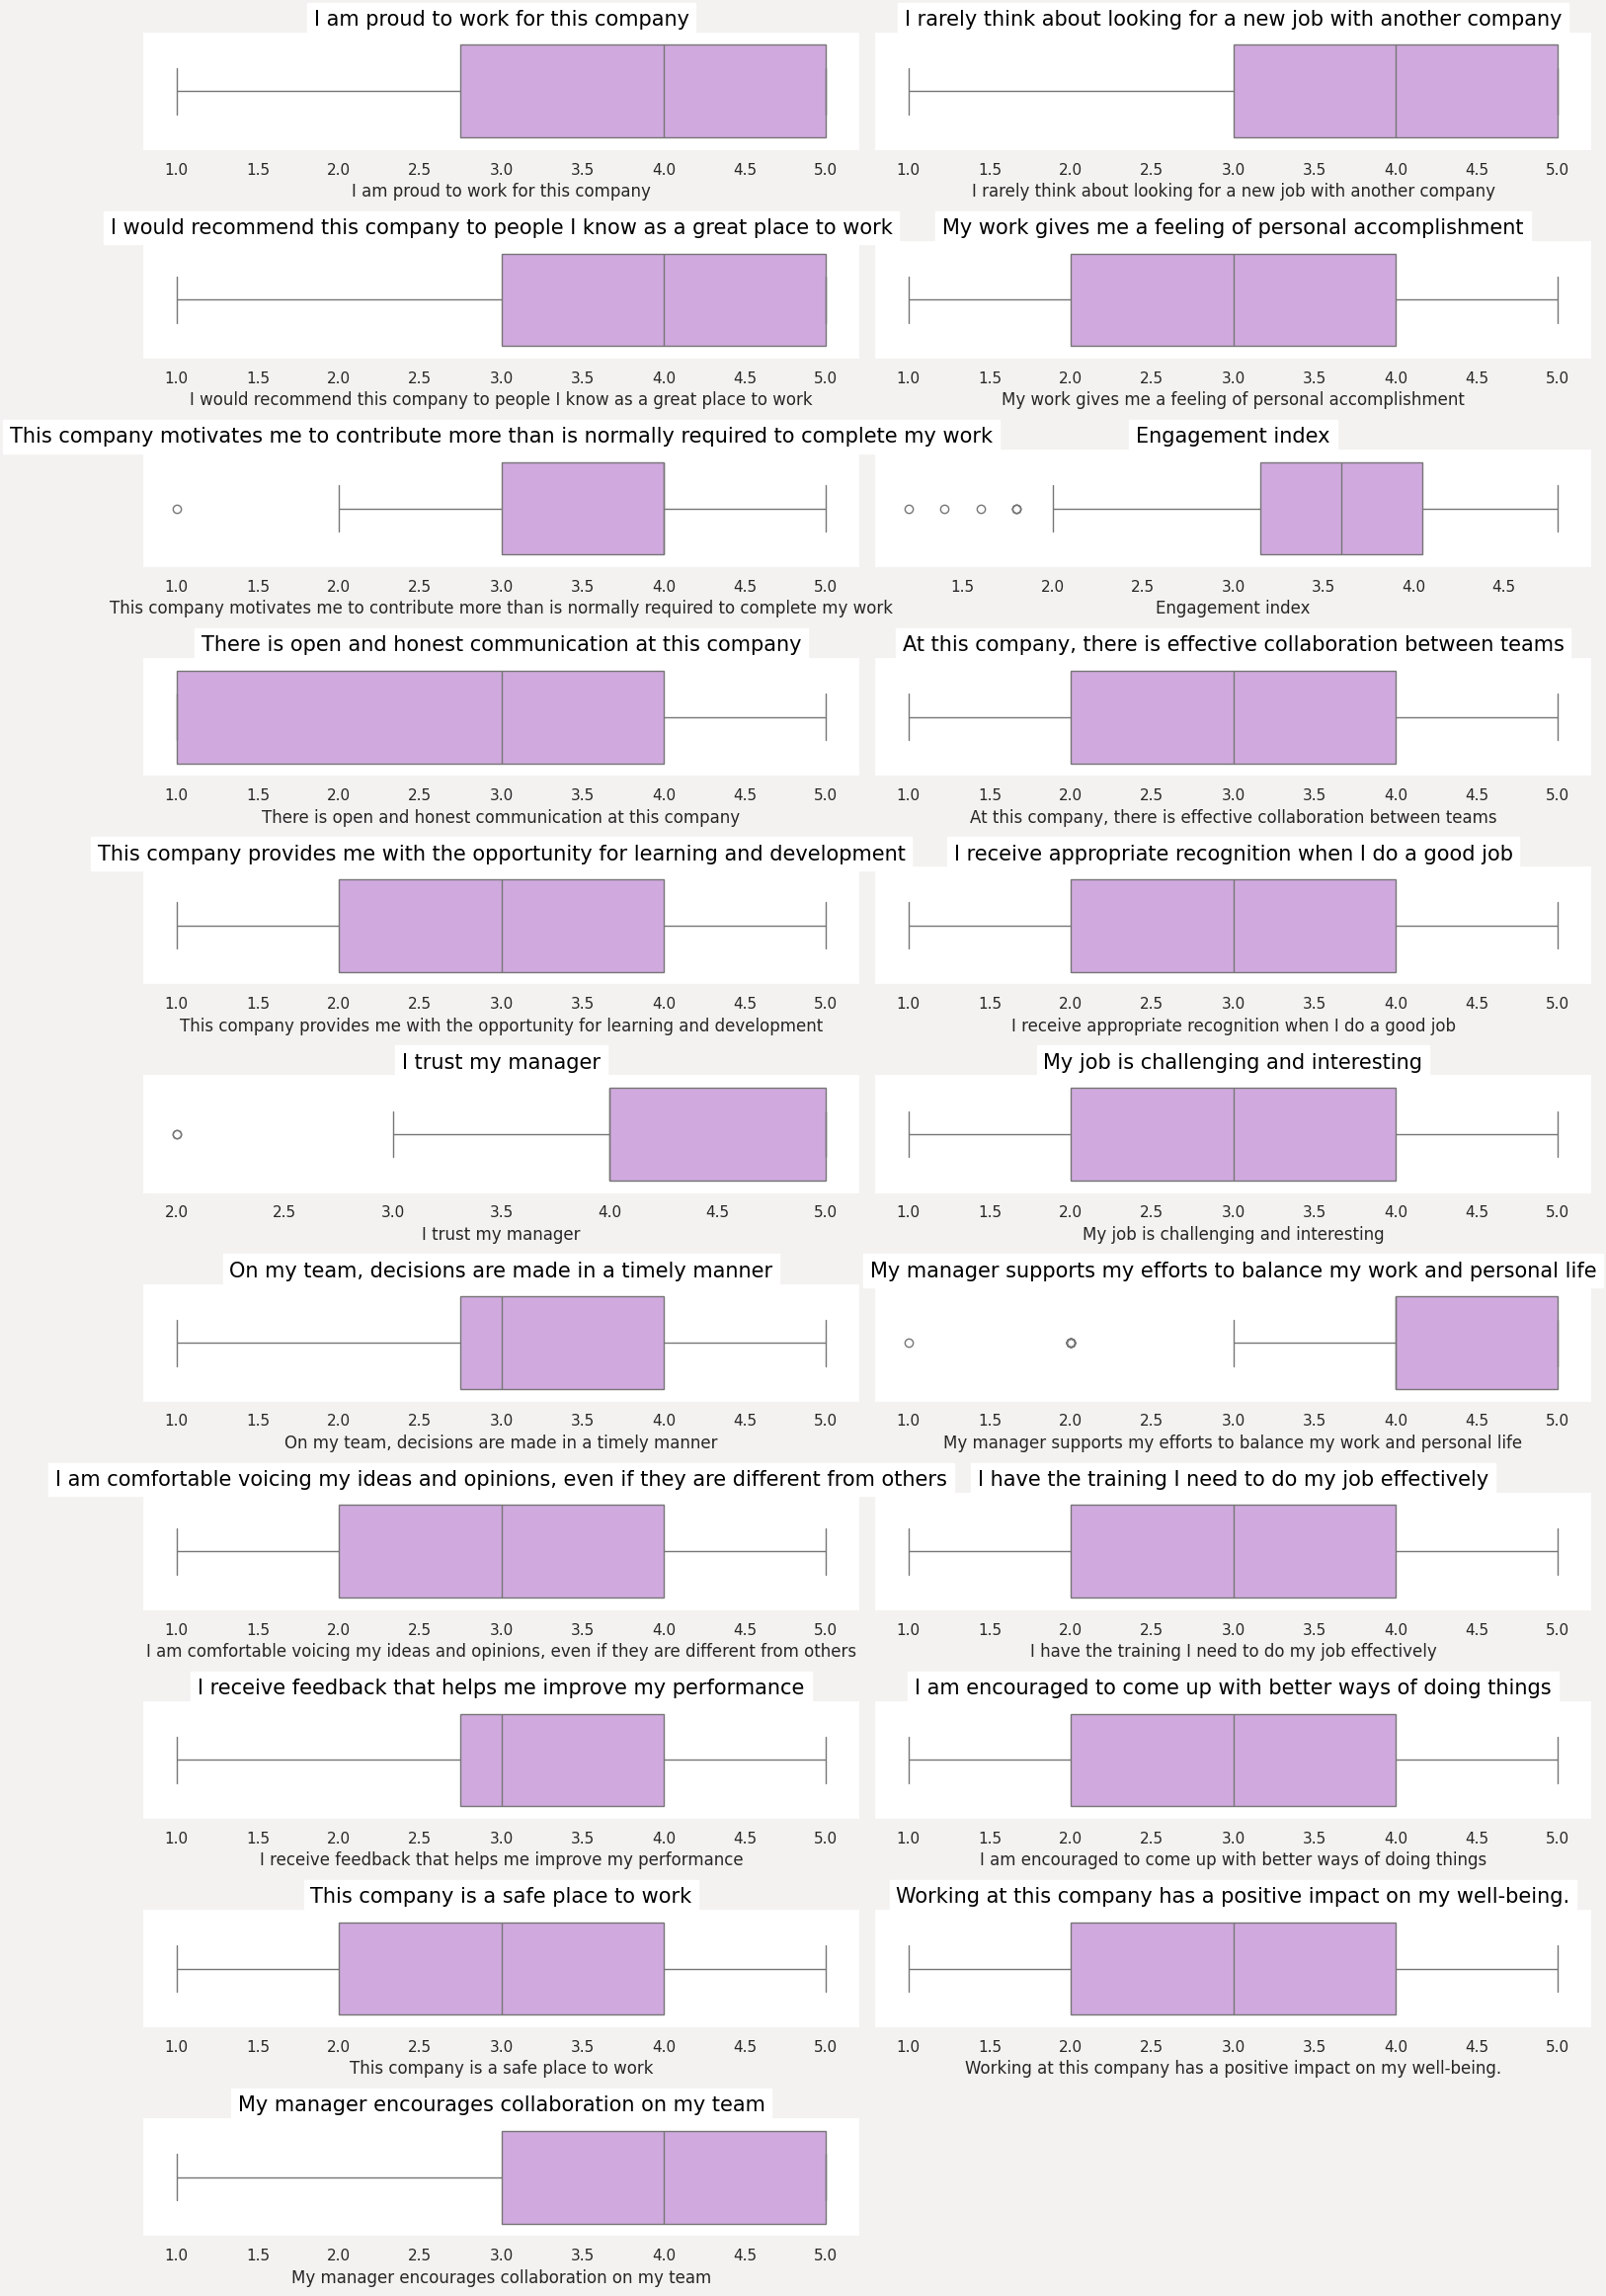

In [60]:
#Creating plots
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

# **Machine learning**


In [170]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(num)
X.shape
X

,I am proud to work for this company,I rarely think about looking for a new job with another company,I would recommend this company to people I know as a great place to work,My work gives me a feeling of personal accomplishment,This company motivates me to contribute more than is normally required to complete my work,Engagement index,There is open and honest communication at this company,"At this company, there is effective collaboration between teams",This company provides me with the opportunity for learning and development,I receive appropriate recognition when I do a good job,...,My job is challenging and interesting,"On my team, decisions are made in a timely manner",My manager supports my efforts to balance my work and personal life,"I am comfortable voicing my ideas and opinions, even if they are different from others",I have the training I need to do my job effectively,I receive feedback that helps me improve my performance,I am encouraged to come up with better ways of doing things,This company is a safe place to work,Working at this company has a positive impact on my well-being.,My manager encourages collaboration on my team
ID,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,5,3,4.4,4,3,3,3,...,5,4,5,3,5,5,5,4,4,5
2,4,4,5,3,2,3.6,4,2,4,4,...,3,4,4,2,4,4,5,4,5,4
3,5,4,3,4,2,3.6,5,1,2,3,...,4,2,4,3,3,3,3,3,5,4
4,5,4,5,3,2,3.8,2,2,3,2,...,3,3,4,3,3,3,2,4,1,4
5,4,5,5,4,3,4.2,1,1,2,2,...,3,1,3,5,3,3,5,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3,4,5,3,5,4.0,1,3,5,2,...,3,4,4,5,5,4,4,1,5,5
97,3,2,4,5,2,3.2,1,1,5,4,...,3,5,5,4,4,4,5,2,1,5
98,4,3,2,3,3,3.0,2,2,4,3,...,1,3,5,1,3,5,1,4,1,4


In [115]:
#Clustering
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))


In [116]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [117]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,2789.026400
1,2,2451.987458
2,3,2228.504988
3,4,2134.416737
4,5,2053.849507


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

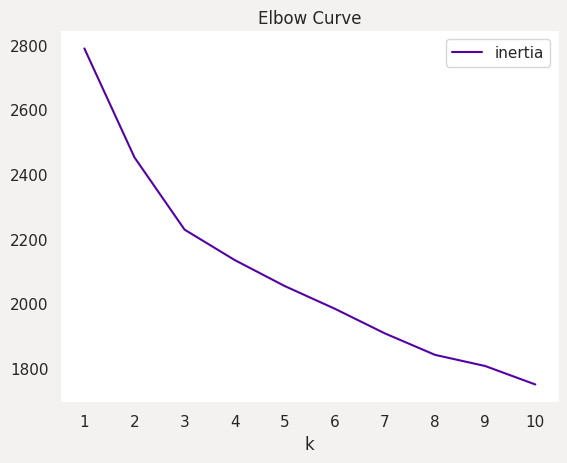

In [118]:

# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

In [119]:

# Define the model with optimal number of clusters
model = KMeans(n_clusters=3, random_state=1)
# Fit the model
model.fit(X)
# Make predictions
kmeans_predictions = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [120]:
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_predictions = agglo_model.fit_predict(X)

In [121]:
birch_model = Birch(n_clusters=3)
birch_model.fit(X)
birch_predictions = birch_model.predict(X)

In [122]:
# Create a copy of the customers_df DataFrame
X_clusters = X.copy()
# Add class columns with the labels to the new DataFrame
X_clusters["kmeans-segments"] = kmeans_predictions
X_clusters["agglomerative-segments"] = agglo_predictions
X_clusters["birch-segments"] = birch_predictions

In [123]:
X_clusters

,I am proud to work for this company,I rarely think about looking for a new job with another company,I would recommend this company to people I know as a great place to work,My work gives me a feeling of personal accomplishment,This company motivates me to contribute more than is normally required to complete my work,Engagement index,There is open and honest communication at this company,"At this company, there is effective collaboration between teams",This company provides me with the opportunity for learning and development,I receive appropriate recognition when I do a good job,...,"I am comfortable voicing my ideas and opinions, even if they are different from others",I have the training I need to do my job effectively,I receive feedback that helps me improve my performance,I am encouraged to come up with better ways of doing things,This company is a safe place to work,Working at this company has a positive impact on my well-being.,My manager encourages collaboration on my team,kmeans-segments,agglomerative-segments,birch-segments
ID,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,5,3,4.4,4,3,3,3,...,3,5,5,5,4,4,5,1,0,0
2,4,4,5,3,2,3.6,4,2,4,4,...,2,4,4,5,4,5,4,1,0,0
3,5,4,3,4,2,3.6,5,1,2,3,...,3,3,3,3,3,5,4,1,0,0
4,5,4,5,3,2,3.8,2,2,3,2,...,3,3,3,2,4,1,4,2,2,1
5,4,5,5,4,3,4.2,1,1,2,2,...,5,3,3,5,4,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3,4,5,3,5,4.0,1,3,5,2,...,5,5,4,4,1,5,5,1,0,0
97,3,2,4,5,2,3.2,1,1,5,4,...,4,4,4,5,2,1,5,1,0,0
98,4,3,2,3,3,3.0,2,2,4,3,...,1,3,5,1,4,1,4,2,2,1


In [124]:

!pip install hvplot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
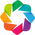

:Overlay
   .Scatter.I             :Scatter   [There is open and honest communication at this company]   (Engagement index,kmeans-segments)
   .Curve.Regression_Line :Curve   [x]   (y)

In [162]:

import hvplot.pandas
import holoviews as hv


hv.extension('bokeh')

# Assuming X_clusters is your DataFrame
# X_clusters should contain 'There is open and honest communication at this company' and 'Engagement index'

# Fit a linear regression model
X = X_clusters[['There is open and honest communication at this company']].values
y = X_clusters['Engagement index'].values

lm = LinearRegression()
lm.fit(X, y)

# Generate predictions for the regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lm.predict(X_range)

# Create the scatter plot using hvplot
scatter_plot = X_clusters.hvplot.scatter(
    x='There is open and honest communication at this company',
    y='Engagement index',
    c='kmeans-segments',
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel='Engagement index',
    clim=(X_clusters['kmeans-segments'].min(), X_clusters['kmeans-segments'].max()),
    width=600,
    height=400,
    hover_cols=['kmeans-segments'],
    tools=['hover']
)

# Create the regression line
regression_line = hv.Curve((X_range.flatten(), y_pred), label='Regression Line')

# Overlay the regression line on the scatter plot
combined_plot = scatter_plot * regression_line

# Show the combined plot
combined_plot


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
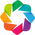

:Overlay
   .Scatter.I             :Scatter   [There is open and honest communication at this company]   (Engagement index,agglomerative-segments)
   .Curve.Regression_Line :Curve   [x]   (y)

In [163]:

import hvplot.pandas
import holoviews as hv


hv.extension('bokeh')

# Assuming X_clusters is your DataFrame
# X_clusters should contain 'There is open and honest communication at this company' and 'Engagement index'

# Fit a linear regression model
X = X_clusters[['There is open and honest communication at this company']].values
y = X_clusters['Engagement index'].values

lm = LinearRegression()
lm.fit(X, y)

# Generate predictions for the regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lm.predict(X_range)

# Create the scatter plot using hvplot
scatter_plot = X_clusters.hvplot.scatter(
    x='There is open and honest communication at this company',
    y='Engagement index',
    c='agglomerative-segments',
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel='Engagement index',
    clim=(X_clusters['agglomerative-segments'].min(), X_clusters['agglomerative-segments'].max()),
    width=600,
    height=400,
    hover_cols=['agglomerative-segments'],
    tools=['hover']
)

# Create the regression line
regression_line = hv.Curve((X_range.flatten(), y_pred), label='Regression Line')

# Overlay the regression line on the scatter plot
combined_plot = scatter_plot * regression_line

# Show the combined plot
combined_plot


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
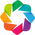

:Overlay
   .Scatter.I             :Scatter   [There is open and honest communication at this company]   (Engagement index,birch-segments)
   .Curve.Regression_Line :Curve   [x]   (y)

In [164]:

import hvplot.pandas
import holoviews as hv


hv.extension('bokeh')

# Assuming X_clusters is your DataFrame
# X_clusters should contain 'There is open and honest communication at this company' and 'Engagement index'

# Fit a linear regression model
X = X_clusters[['There is open and honest communication at this company']].values
y = X_clusters['Engagement index'].values

lm = LinearRegression()
lm.fit(X, y)

# Generate predictions for the regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lm.predict(X_range)

# Create the scatter plot using hvplot
scatter_plot = X_clusters.hvplot.scatter(
    x='There is open and honest communication at this company',
    y='Engagement index',
    c='birch-segments',
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel='Engagement index',
    clim=(X_clusters['birch-segments'].min(), X_clusters['birch-segments'].max()),
    width=600,
    height=400,
    hover_cols=['birch-segments'],
    tools=['hover']
)

# Create the regression line
regression_line = hv.Curve((X_range.flatten(), y_pred), label='Regression Line')

# Overlay the regression line on the scatter plot
combined_plot = scatter_plot * regression_line

# Show the combined plot
combined_plot


There is no relation between engagement and communications

In [158]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=3)

In [159]:
# Fit the df_stocks_scaled data to the PCA
pca_data = pca.fit_transform(X)

In [160]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.17507744, 0.11931894, 0.08846369])

In [161]:
# Fit the PCA model to your data
pca.fit(X)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = X.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is I rarely think about looking for a new job with another company
Component 2: Most important feature is I am proud to work for this company
Component 3: Most important feature is There is open and honest communication at this company


In [171]:
# Define your target variable (make sure 'y' is correctly defined)
y = X['There is open and honest communication at this company'].values.reshape(-1, 1)


In [172]:
# Drop the feature 'There is open and honest communication at this company'
X = X.drop(['There is open and honest communication at this company'], axis=1)

In [175]:
# Assuming you have `X` as your features and `y` as your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [178]:
y_pred = lm.predict(X_test)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
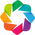

KeyError: "None of [Index(['There is open and honest communication at this company'], dtype='object')] are in the [columns]"

In [180]:
import numpy as np
import hvplot.pandas
import holoviews as hv

hv.extension('bokeh')

# Assuming `X` is your DataFrame and `y` is your target
# We need to fit the model again for the single feature case
X_single_feature = X[['There is open and honest communication at this company']]  # Replace with your actual feature name

lm = LinearRegression()
lm.fit(X_single_feature, y)

# Generate predictions for the feature range
X_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)
y_pred_range = lm.predict(X_range)

# Create the scatter plot using hvplot
scatter_plot = X_single_feature.hvplot.scatter(
    x='Your_Single_Feature',
    y=y.flatten(),  # Flatten y to fit the scatter plot requirements
    color='blue',
    alpha=0.7,
    ylabel='Target Variable',
    width=600,
    height=400,
    tools=['hover']
)

# Create the regression line
regression_line = hv.Curve((X_range.flatten(), y_pred_range.flatten()), label='Regression Line')

# Overlay the regression line on the scatter plot
combined_plot = scatter_plot * regression_line

# Show the combined plot
combined_plot
